Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing all the important libraries

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras

In [4]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

baseDir = "/content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/"
# Changing the directory
%cd baseDir

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'baseDir'
/content


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
data_dir_train = pathlib.Path(baseDir + "Train/")
data_dir_test = pathlib.Path(baseDir + "Test/")

In [6]:
import os
import shutil

def delete_subdirectory_by_name(parent_directory, subdirectory_name):
    # Check if the parent directory exists
    if os.path.exists(parent_directory):
        found = False
        # Iterate over all items in the parent directory
        for item in os.listdir(parent_directory):
            item_path = os.path.join(parent_directory, str(item) + "/" + subdirectory_name)
            print(item_path)
            found = False
            # Check if the item is a directory and matches the subdirectory name
            if os.path.isdir(item_path):
                found = True
                try:
                    # Remove the directory and all its contents
                    shutil.rmtree(item_path)
                    print(f'Subdirectory {item_path} has been deleted successfully.')
                except Exception as e:
                    print(f'Failed to delete {item_path}. Reason: {e}')
                break
        if not found:
            print(f'Subdirectory {subdirectory_name} not found in {parent_directory}.')
    else:
        print(f'The parent directory {parent_directory} does not exist.')

# Usage
delete_subdirectory_by_name(data_dir_train, "output")


/content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/nevus/output
/content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/squamous cell carcinoma/output
/content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/pigmented benign keratosis/output
/content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/vascular lesion/output
/content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/basal cell carcinoma/output
/content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/melanoma/output
/content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISI

In [7]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [9]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,  # 20% for validation
    subset="training",
    seed=123,
    image_size=(img_height, img_width),  # Resize images
    batch_size=batch_size  # Adjust batch size as needed
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,  # 20% for validation
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),  # Resize images
    batch_size=batch_size  # Adjust batch size as needed
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

# Get the file paths BEFORE applying transformations
file_paths = train_ds.file_paths
print(file_paths)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
['/content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/melanoma/ISIC_0010050.jpg', '/content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/actinic keratosis/ISIC_0026702.jpg', '/content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/melanoma/ISIC_0011136.jpg', '/content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/nevus/ISIC_0000535.jpg', '/content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/actinic keratosis/ISIC_0027580.jpg', '/content

### Visualize the data
#### Code to visualize one instance of all the nine classes present in the dataset

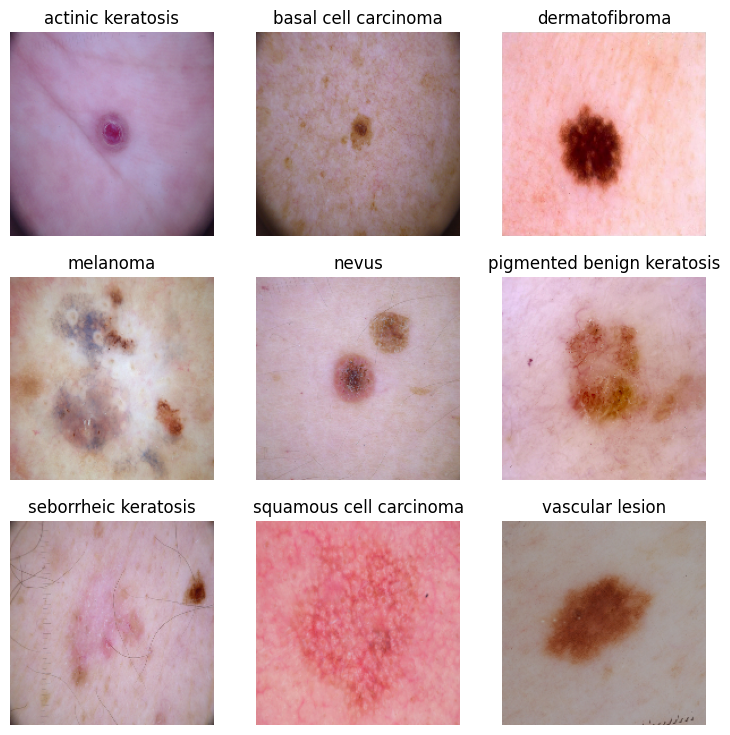

In [12]:
plt.figure(figsize=(9, 9))
for i, class_name in enumerate(class_names):
    # Filter the dataset for the current class
    filtered_ds = train_ds.filter(lambda x, y: tf.reduce_any(tf.equal(y, i)))

    # Get the first image from the filtered dataset
    for images, labels in filtered_ds.take(1):
        image = images[0].numpy().astype("uint8")

        # Plot the image
        plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        plt.title(class_name)
        plt.axis("off")

plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [14]:
# Building the CNN model
model = keras.models.Sequential([
    # Rescaling layer for normalization (crucial step)
    keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    # Flatten for dense layers
    keras.layers.Flatten(),

    # Dense (fully connected) layers
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),  # Add dropout for regularization
    keras.layers.Dense(9, activation='softmax')  # Output layer for 9 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [15]:
###choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [16]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [17]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.1729 - loss: 2.3171 - val_accuracy: 0.1745 - val_loss: 2.0262
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2605 - loss: 1.9614 - val_accuracy: 0.3602 - val_loss: 1.8248
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.3477 - loss: 1.8362 - val_accuracy: 0.4273 - val_loss: 1.6091
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.4000 - loss: 1.6697 - val_accuracy: 0.4698 - val_loss: 1.6029
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4654 - loss: 1.5474 - val_accuracy: 0.4877 - val_loss: 1.4877
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.4813 - loss: 1.5166 - val_accuracy: 0.4407 - val_loss: 1.5970
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.4540 - loss: 1.5360 - val_accuracy: 0.5123 - val_loss: 1.4342
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5030 - loss: 1.4140 - val_accuracy: 0.5101 - v

### Visualizing training results

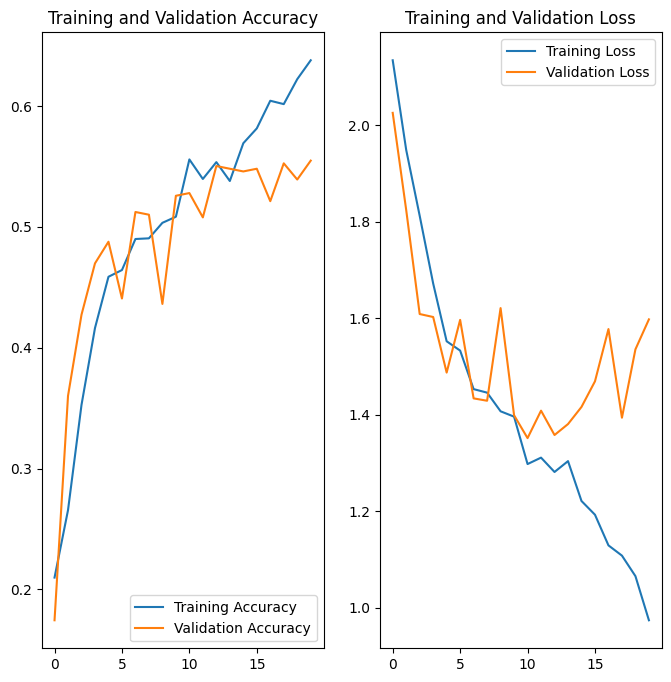

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
# Evaluate on the train set
loss, accuracy = model.evaluate(train_ds)
print("Train Loss:", loss)
print("Train Accuracy:", accuracy)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7208 - loss: 0.7602
Train Loss: 0.7690165638923645
Train Accuracy: 0.7193080186843872


In [20]:
# Evaluate on the validation set
loss, accuracy = model.evaluate(val_ds)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6146 - loss: 1.5302
Validation Loss: 1.5979962348937988
Validation Accuracy: 0.5548098683357239


The model is overfitting based on the plot. Around epoch 10 the validation accuracy starts decreasing. Similarly validation loss is high.

### Write your findings here

In [21]:
# after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.9, 1.1),
    zoom_range=0.1,
    shear_range=0.1
)

# Collect images and labels into NumPy arrays
images = []
labels = []
for image_batch, label_batch in train_ds:
    for image, label in zip(image_batch, label_batch):
        images.append(image.numpy())
        labels.append(label.numpy())
images = np.array(images)
labels = np.array(labels)

# Fit the generator to your training dataset
datagen.fit(images)

# Use the generator to augment data on the fly during training
model.fit(
    datagen.flow(images, labels, batch_size=batch_size),
    epochs=20,
    validation_data=val_ds  # Pass your validation dataset here
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 237ms/step - accuracy: 0.5052 - loss: 1.4119 - val_accuracy: 0.5302 - val_loss: 1.3427
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 246ms/step - accuracy: 0.5243 - loss: 1.3373 - val_accuracy: 0.5436 - val_loss: 1.3245
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 239ms/step - accuracy: 0.5278 - loss: 1.3677 - val_accuracy: 0.5391 - val_loss: 1.2887
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 247ms/step - accuracy: 0.5594 - loss: 1.2769 - val_accuracy: 0.4877 - val_loss: 1.4711
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 247ms/step - accuracy: 0.5155 - loss: 1.3844 - val_accuracy: 0.5615 - val_loss: 1.3631
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 250ms/step - accuracy: 0.5216 - loss: 1.3631 - val_accuracy: 0.5235 - val_loss: 1.3425
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 248ms/step - accuracy: 0.5410 - loss: 1.2718 - val_accuracy: 0.5391 - val_loss: 1.3633
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 245ms/step - accuracy: 0.5465 - loss: 1.2723 - val_accuracy: 0.528

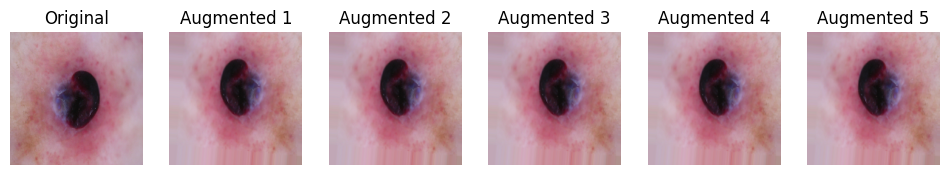

In [22]:
# visualize how your augmentation strategy works for one instance of training image.
# Get one image from your training dataset
for images, labels in train_ds.take(1):
    sample_image = images[0]

# Create a batch of the same image (required for datagen.flow)
sample_image_batch = np.expand_dims(sample_image, 0)

# Generate a batch of augmented images
augmented_images = next(datagen.flow(sample_image_batch, batch_size=1))

# Display the original and augmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 6, 1)
plt.imshow(sample_image.numpy().astype("uint8"))
plt.title("Original")
plt.axis("off")

for i in range(5):
    plt.subplot(1, 6, i + 2)
    augmented_img = augmented_images[0]
    plt.imshow(augmented_img.astype("uint8"))
    plt.title(f"Augmented {i+1}")
    plt.axis("off")

plt.show()

### Create the model, compile and train the model


In [23]:
# Building the CNN model
model = keras.models.Sequential([
    # Rescaling layer for normalization (crucial step)
    keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    # Flatten for dense layers
    keras.layers.Flatten(),

    # Dense (fully connected) layers
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),  # Add dropout for regularization
    keras.layers.Dense(9, activation='softmax')  # Output layer for 9 classes
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compiling the model

In [24]:
## Your code goes here
# Choose SGD with a learning rate of 0.01 (adjust as needed)
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer="adam",
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [25]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.1617 - loss: 2.2733 - val_accuracy: 0.2483 - val_loss: 1.9445
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.2791 - loss: 1.9192 - val_accuracy: 0.4161 - val_loss: 1.7853
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.3680 - loss: 1.7409 - val_accuracy: 0.4407 - val_loss: 1.6078
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.4048 - loss: 1.6621 - val_accuracy: 0.4922 - val_loss: 1.5144
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5053 - loss: 1.4763 - val_accuracy: 0.5056 - val_loss: 1.4621
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4859 - loss: 1.5088 - val_accuracy: 0.5034 - val_loss: 1.4573
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4886 - loss: 1.4500 - val_accuracy: 0.4989 - val_loss: 1.4353
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5080 - loss: 1.4378 - val_accuracy: 0.4989 - v

### Visualizing the results

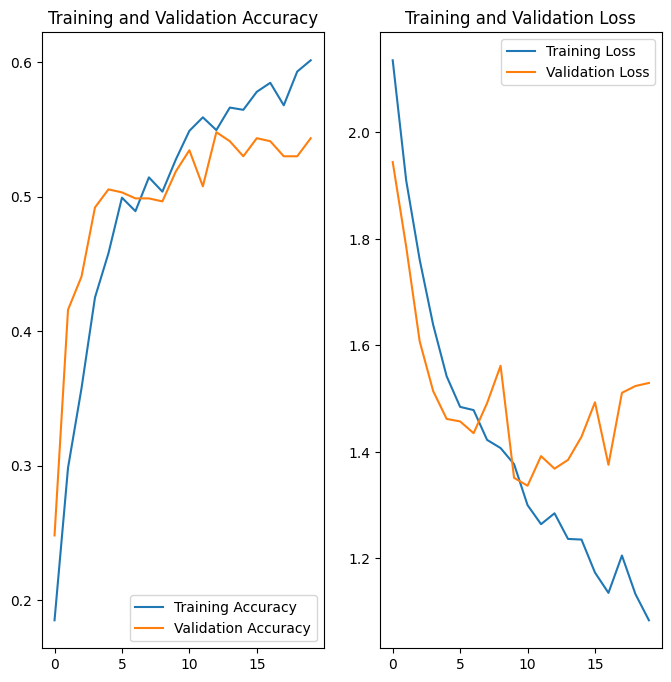

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
# Evaluate on the train set
loss, accuracy = model.evaluate(train_ds)
print("Train Loss:", loss)
print("Train Accuracy:", accuracy)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6991 - loss: 0.8834
Train Loss: 0.8881767392158508
Train Accuracy: 0.6858258843421936


In [28]:
# Evaluate on the validation set
loss, accuracy = model.evaluate(val_ds)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5852 - loss: 1.5688
Validation Loss: 1.5295709371566772
Validation Accuracy: 0.5436241626739502


#### Here are the findings or observartion
1. Compared to earlier model the overfitting is slightly reduced.
2. The validation loss is slightly early in the first model and here it is slightly delayed
3. Loss value is less in second model

#### Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

[3, 4, 5, 0, 8, 2, 7, 1, 6]
[352, 277, 370, 92, 115, 77, 142, 309, 58]


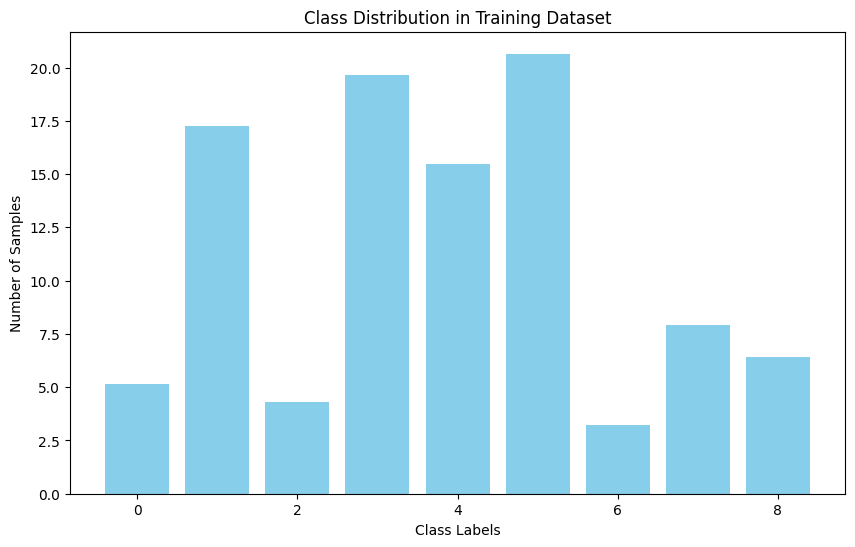

In [29]:
import collections

# Gather class labels from your dataset
labels = []
for _, label in train_ds:
    labels.extend(label.numpy())

# Count occurrences of each class label
class_counts = collections.Counter(labels)


# Get unique class labels and their corresponding counts
class_labels = list(class_counts.keys())
class_counts = list(class_counts.values())

print(class_labels)
print(class_counts)
#Normalize counts to get percentages
total_samples = len(labels)
class_percentages = [(count / total_samples) * 100 for count in class_counts]

plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_percentages, color='skyblue')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Dataset')
plt.show()

#### indings here:
#### Which class has the least number of samples?
.  With 52 samples label 6 has least number
#### Which classes dominate the data in terms proportionate number of samples?
. With 370 samples label 5 has highest


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [30]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [31]:
import Augmentor
import shutil
import os

def delete_directory(directory):
    # Check if the directory exists
    if os.path.exists(directory):
        try:
            # Remove the directory and all its contents
            shutil.rmtree(directory)
            print(f'Directory {directory} has been deleted successfully.')
        except Exception as e:
            print(f'Failed to delete {directory}. Reason: {e}')
    else:
        print(f'The directory {directory} does not exist.')

for i in class_names:
    classDir = str(data_dir_train) + "/" + str(i)
    classOutputDir = classDir + "/output"
    delete_directory(classOutputDir)
    p = Augmentor.Pipeline(classDir)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

The directory /content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/actinic keratosis/output does not exist.
Initialised with 114 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C50404E2C20>: 100%|██████████| 500/500 [00:23<00:00, 21.04 Samples/s]


The directory /content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/basal cell carcinoma/output does not exist.
Initialised with 376 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7C505B8AD120>: 100%|██████████| 500/500 [00:25<00:00, 19.91 Samples/s]


The directory /content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/dermatofibroma/output does not exist.
Initialised with 95 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C50580AC400>: 100%|██████████| 500/500 [00:18<00:00, 27.76 Samples/s]


The directory /content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/melanoma/output does not exist.
Initialised with 438 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7C50582BCD90>: 100%|██████████| 500/500 [01:32<00:00,  5.43 Samples/s]


The directory /content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/nevus/output does not exist.
Initialised with 357 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7C504049F220>: 100%|██████████| 500/500 [01:18<00:00,  6.38 Samples/s]


The directory /content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/pigmented benign keratosis/output does not exist.
Initialised with 462 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C504049F430>: 100%|██████████| 500/500 [00:18<00:00, 27.11 Samples/s]


The directory /content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/seborrheic keratosis/output does not exist.
Initialised with 77 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7C50583D6DD0>: 100%|██████████| 500/500 [00:39<00:00, 12.70 Samples/s]


The directory /content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/squamous cell carcinoma/output does not exist.
Initialised with 181 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C4FE41C3280>: 100%|██████████| 500/500 [00:17<00:00, 28.76 Samples/s]


The directory /content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/vascular lesion/output does not exist.
Initialised with 139 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C50580AC430>: 100%|██████████| 500/500 [00:19<00:00, 25.10 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [32]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [33]:
from glob import glob

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/nevus/output/nevus_original_ISIC_0000232.jpg_93ab4674-9d1b-460c-8217-5fb7089eee8a.jpg',
 '/content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/nevus/output/nevus_original_ISIC_0000510.jpg_c58fb910-d991-4ee5-b552-7ebd57bad71c.jpg',
 '/content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/nevus/output/nevus_original_ISIC_0029210.jpg_b703dec1-9cba-4cac-8269-2e839b9342e1.jpg',
 '/content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration/Train/nevus/output/nevus_original_ISIC_0000439.jpg_b7930fdd-2336-43ce-8055-3ad21127aec3.jpg',
 '/content/drive/My Drive/Colab Notebooks/MelanomaDetectionAssignment/SkinCancerISICTheInternationalSkinImagingCollaboration

In [34]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',


In [35]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [36]:
labelsClassNames = []
for _, label_batch in train_ds:
    batch_labels = [class_names[label] for label in label_batch.numpy()]
    labelsClassNames.extend(batch_labels)

original_df = pd.DataFrame({'Path': file_paths, 'Label': labelsClassNames})

df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

# Concatenate the new DataFrame to the original DataFrame
new_df = pd.concat([original_df, df2], ignore_index=True)

print(new_df)

                                                   Path                 Label
0     /content/drive/My Drive/Colab Notebooks/Melano...  basal cell carcinoma
1     /content/drive/My Drive/Colab Notebooks/Melano...     actinic keratosis
2     /content/drive/My Drive/Colab Notebooks/Melano...     actinic keratosis
3     /content/drive/My Drive/Colab Notebooks/Melano...                 nevus
4     /content/drive/My Drive/Colab Notebooks/Melano...              melanoma
...                                                 ...                   ...
6287  /content/drive/My Drive/Colab Notebooks/Melano...     actinic keratosis
6288  /content/drive/My Drive/Colab Notebooks/Melano...     actinic keratosis
6289  /content/drive/My Drive/Colab Notebooks/Melano...     actinic keratosis
6290  /content/drive/My Drive/Colab Notebooks/Melano...     actinic keratosis
6291  /content/drive/My Drive/Colab Notebooks/Melano...     actinic keratosis

[6292 rows x 2 columns]


In [37]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    870
melanoma                      852
basal cell carcinoma          809
nevus                         777
squamous cell carcinoma       642
vascular lesion               615
actinic keratosis             592
dermatofibroma                577
seborrheic keratosis          558
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

In [38]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [39]:
#data_dir_train="path to directory with training data + data created using augmentor"
data_dir_train = pathlib.Path(baseDir + "Train/")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size =(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Create a validation dataset

In [40]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Create your model (make sure to include normalization)

In [41]:
model = keras.models.Sequential([
    # Rescaling layer for normalization (crucial step)
    keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    # Flatten for dense layers
    keras.layers.Flatten(),

    # Dense (fully connected) layers
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),  # Add dropout for regularization
    keras.layers.Dense(9, activation='softmax')  # Output layer for 9 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Compile your model (Choose optimizer and loss function appropriately)

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

#### Train your model

In [43]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 56s 287ms/step - accuracy: 0.1598 - loss: 2.2489 - val_accuracy: 0.3779 - val_loss: 1.6738
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 73s 263ms/step - accuracy: 0.3430 - loss: 1.7300 - val_accuracy: 0.4759 - val_loss: 1.4082
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 79s 249ms/step - accuracy: 0.4242 - loss: 1.5084 - val_accuracy: 0.4915 - val_loss: 1.3192
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 83s 253ms/step - accuracy: 0.4701 - loss: 1.4033 - val_accuracy: 0.5590 - val_loss: 1.1885
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 79s 236ms/step - accuracy: 0.4881 - loss: 1.3182 - val_accuracy: 0.5501 - val_loss: 1.2145
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 236ms/step - accuracy: 0.4951 - loss: 1.3265 - val_accuracy: 0.5672 - val_loss: 1.1646
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 43s 250ms/step - accuracy: 0.5396 - loss: 1.1964 - val_accuracy: 0.6177 - val_loss: 1.0446
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 79s 234ms/step - accuracy: 0.5753 - loss: 1

#### Visualize the model results

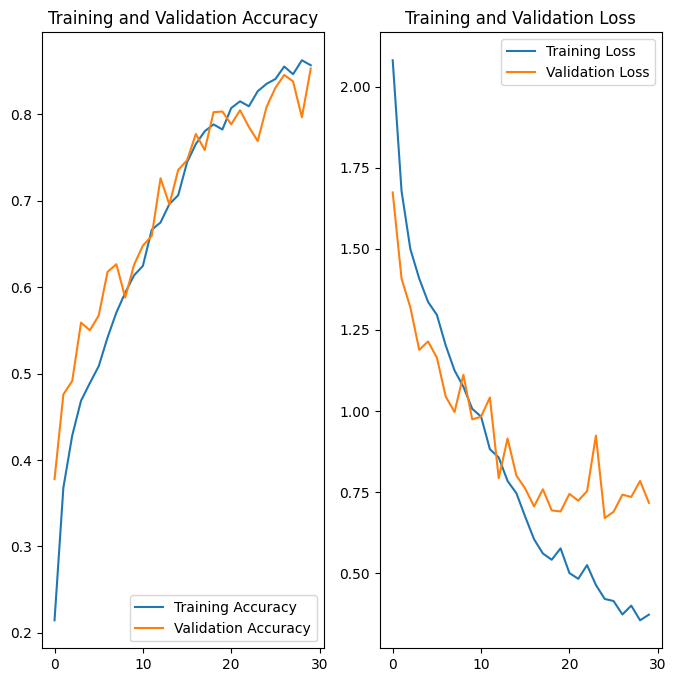

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [45]:
# Evaluate on the Train set
loss, accuracy = model.evaluate(train_ds)
print("Train Loss:", loss)
print("Train Accuracy:", accuracy)

169/169 ━━━━━━━━━━━━━━━━━━━━ 31s 182ms/step - accuracy: 0.9402 - loss: 0.1708
Train Loss: 0.16118033230304718
Train Accuracy: 0.9445474743843079


In [46]:
# Evaluate on the validation set
loss, accuracy = model.evaluate(val_ds)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - accuracy: 0.8534 - loss: 0.7662
Validation Loss: 0.7170184850692749
Validation Accuracy: 0.8530066609382629


In [47]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  image_size =(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [48]:
# Evaluate on the test set
loss, accuracy = model.evaluate(test_ds)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 6s/step - accuracy: 0.3666 - loss: 6.0787
Test Loss: 5.837944507598877
Test Accuracy: 0.39830508828163147


In [55]:
predictions = model.predict(test_ds)

class_names = test_ds.class_names
disease_map = dict(zip(class_names, predictions))
print("Predication on test data")
print("========================")
for key, value in disease_map.items():
    print(f"{key}: {value}")
    print(f"Highest: {np.max(value)}; Lowest: {np.min(value)}")
    print("")

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 815ms/step
Predication on test data
actinic keratosis: [2.4663561e-04 7.1906699e-03 9.3335603e-07 5.4956423e-03 8.5297518e-04
 9.8391587e-01 1.8288119e-06 2.2953553e-03 7.6377576e-10]
Highest: 0.9839158654212952; Lowest: 7.637757648559784e-10

basal cell carcinoma: [9.5588970e-04 8.0068334e-05 7.8819547e-05 5.7794839e-01 2.4994786e-01
 3.1637359e-02 1.3932249e-01 2.8890898e-05 2.9907625e-07]
Highest: 0.5779483914375305; Lowest: 2.990762482113496e-07

dermatofibroma: [2.9019341e-07 1.4728428e-08 4.8243531e-14 6.3301345e-06 1.8058439e-06
 9.9999142e-01 8.0772269e-09 1.0182124e-07 1.2044478e-18]
Highest: 0.9999914169311523; Lowest: 1.204447763771113e-18

melanoma: [6.3983954e-02 9.3627848e-02 6.5009874e-01 4.9007363e-06 9.8621752e-03
 2.7679419e-03 6.0708873e-09 1.7964606e-01 8.5280572e-06]
Highest: 0.6500987410545349; Lowest: 6.0708873483861225e-09

nevus: [1.2205408e-11 2.6065843e-08 4.8582686e-14 9.7465456e-01 2.0027736e-02
 1.6676396e-10 5.3176377e-03 3.536

#### Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

Below skin disease have high predicatablity compared with rest of the skin diseases.
actinic keratosis, dermatofibroma, nevus, pigmented benign keratosis, squamous cell carcinoma and vascular lesion.

The augumentation statergy helped in getting rid of overfitting.

Rectifying the imbalance applying Augmentor helped in getting rid of biased learning and better generalization.
